Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

#Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

#Bilježnica 2: Osnovni koncepti strojnog učenja

(c) 2015 Jan Šnajder

<i>Verzija: 0.3 (2015-10-20)</i>

In [1]:
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from numpy.random import normal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Sadržaj:

1. Tipični koraci primjene algoritma SU

* Prostor primjera

* Hipoteza i model

* Empirijska pogreška

* Prostor inačica

* Složenost modela

* Induktivna pristranost

* Tri komponente svakog algoritma SU

* Primjer: regresija

* Problem šuma

* Odabir modela

#1. Tipični koraci primjene algoritma SU



1. Priprema podataka

2. (Označavanje podataka za učenje i ispitivanje)

3. (Redukcija dimenzionalnosti)

4. **Odabir modela**

5. **Učenje modela**

6. **Vrednovanje modela**

7. **Dijagnostika i ispravljanje (debugging)**

8. Instalacija (deployment)


* Naš fokus su koraci 4-7

#2. Prostor primjera


* Prostor primjera (ulazni prostor): $\mathcal{X}$


* Dimenzija ulaznog prostora: $n$


* Primjer je vektor u ulaznom prostoru: $\mathbf{x} = (x_1, x_2, \dots, x_n)^T \in \mathcal{X}$


* Oznaka (engl. *label*) klase (za klasifikaciju) ili ciljna vrijednost (za regresiju): $y$


* Skup oznaka klase: $\mathcal{Y} = \{0, \dots, K\}$
  * Broj klasa: $K$
  * Binarna klasifikacija: $K=2$, $\mathcal{Y} = \{0,1\}$


* Broj primjera: $N$


* Skup označenih primjera za učenje: $\mathcal{D} = \big\{(x^{(i)}, y^{(i)})\big\}_{i=1}^N \subseteq \mathcal{X}\times\mathcal{Y}$


* Matrično:
\begin{array}{lllll|l}
&x_1 & x_2 & \cdots & x_n & \mathbf{y}\\
\hline
\mathbf{x}^{(1)} = & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} & y^{(1)}\\
\mathbf{x}^{(2)} = & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} & y^{(2)}\\
& \vdots\\
\mathbf{x}^{(N)} = & x_1^{(N)} & x_2^{(N)} & \cdots & x_n^{(N)} & y^{(N)}\\
\end{array}
Matrica $\mathcal{D}$ sastavljena je od matrice $\mathbf{X}_{N\times n}$ i vektora $\mathbf{y}_{N\times 1}$


#3. Hipoteza i model

* Hipoteza: $h : \mathcal{X} \to \mathcal{Y}$
  * Funkcija koja svakom primjeru (iz prostora primjera) dodjeljuje oznaku klase (iz skupa oznaka klase)


* Binarna klasifikacija: $h : \mathcal{Y} \to \{0, 1\}$
  * Definicija: Primjer $\mathbf{x}\in\mathcal{X}$ **zadovoljava** hipotezu $h$ akko $h(\mathbf{x})=1$
  * Definicija: Hipoteza $h$ je **konzistentna** s primjerom $(\mathbf{x}, y)$ akko $h(\mathbf{x})=y$


* Općenitije: $h(\mathbf{x} | \theta)$
  * Funkcija parametrizirana parametrima $\theta$ (vektor parametara)
  * Npr.:
    * Linearna regresija: $h(x) = \theta_1 x + \theta_0$
    * Linearan klasifikacijski model: $h(x_1,x_2|\theta_0,\theta_1,\theta_2) = \mathbf{1}\{\theta_1 x_1 + \theta_2 x_2 + \theta_0 \geq 0\}$



* Model $\mathcal{H}$: skup hipoteza $h$


* Formalno: $\mathcal{H} = \big\{ h(\mathbf{x} | \theta)\big\}_{\theta}$
  * Familija funkcija parametriziranih s $\theta$
  
  
* Učenje (treniranje modela) svodi se na **pretraživanje** prostora hipoteza $\mathcal{H}$ i nalaženje **najbolje** hipoteze $h\in \mathcal{H}$
  * Najbolja hipoteza: ona koja najtočnije klasificira primjere (klasifikacija) odnosno daje vrijednosti najbliže ciljnim vrijednostima (regresija)
  * Optimizacijski problem!
  
  
* [Primjer: Ulazni prostor + prostor parametara]


* $\mathcal{H}$ je vrlo velik, pa nam često treba heuristička optimizacija

#4. Empirijska pogreška

* Iskazuje koliko točno hipoteza klasificira primjere (klasifikacija) ili koliko su vrijednosti blizu ciljnih vrijednosti (regresija)


* Pogreška klasifikacija (engl. *misclassification error*):

$$
E(h|\mathcal{D}) 
= \frac{1}{N} \sum_{i=1}^N \mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}
$$

* Specifično, za binarnu klasifikaciju s $\mathcal{Y}=\{0,1\}$:

$$
E(h|\mathcal{D}) = \frac{1}{N} \sum_{i=1}^N |h(\mathbf{x})^{(i)} - y^{(i)}|
$$

* [Primjer]


* Vrijednost pogreške načinjene na pojedinačnom primjeru (funkcija unutar sume) zove se **funkcija gubitka** (engl. *loss function*)
  * Gubitak $\mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}$ zove se **gubitak nula-jedan** (engl. zero-one loss)

#5. Prostor inačica (engl. version space)


* $\mathit{VS}_{\mathcal{H},\mathcal{D}} \subseteq \mathcal{H}$


* Skup hipoteza iz $\mathcal{H}$ koje su konzistentne s primjerima za učenje $\mathcal{D}$

$$
\mathit{VS}_{\mathcal{H},\mathcal{D}} =
\Big\{h\in\mathcal{H} \mid \forall(\mathbf{x},y)\in\mathcal{D}.\ \big(h(\mathbf{x})=y\big)\Big\}
$$

* [Primjer]



#6. Složenost modela


* Idealno, u modelu $\mathcal{H}$ postoji hipoteza $h$ koja je konzistentna s $\mathcal{D}$, tj. hipoteza za koju vrijedi $E(h|\mathcal{D}) = 0$


* No, moguće je da takva $h$ ne postoji, tj. $\forall h\in\mathcal{H}. E(h|\mathcal{D}) > 0$


* Tada kažemo da model $\mathcal{H}$ nije dovoljne **složenosti** (ili kapaciteta)


* [Primjer]


* [Zadatak: 6 primjera]

#7. Induktivna pristranost (engl. inductive bias)

* Učenje hipoteze je **loše definiran problem**: $h$ ne slijedi deduktivno iz $\mathcal{D}$


* Primjer 1: Učenje Booleove funkcije

\begin{array}{ccc|c}
x_1 & x_2 & x_3 & y\\
\hline
0&0&0&\color{red}{\textbf{?}}\\
0&0&1&\color{red}{\textbf{?}}\\
0&1&0&1\\
0&1&1&0\\
1&0&0&1\\
1&0&1&0\\
1&1&0&\color{red}{\textbf{?}}\\
1&1&1&1\\
\end{array}

* $N = |\mathcal{D}|=5$, $n=3$, $\mathcal{X} = \{0,1\}^3$, $|\mathit{VS}| = 2^{2^n - N} = 8$


* **Generalizacija** - sposobnost klasifikacije još neviđenih primjera


* Učenje i generalizacija nisu mogući bez **dodatnih pretpostavki**
  * *Futility of bias-free learning*


* **Induktivna pristranost** (engl. inductive bias)
  * $\mathcal{L}$ - algoritam učenja
  * $h_\mathcal{L}$ - hipoteza inducirana pomoću $\mathcal{L}$ na $\mathcal{D}$
  * $h_\mathcal{L}(\mathbf{x})$ - klasifikacija primjera $\mathbf{x}\in\mathcal{X}$
  * Induktivna pristranost od $\mathcal{L}$ je bilo koji skup minimalnih pretpostavki $\mathcal{B}$ takvih da 
  
$$
  \forall \mathcal{D}.\,\forall\mathbf{x}\in \mathcal{X}.\,\big((\mathcal{B}\land\mathcal{D}\land\mathbf{x})\ \vdash\ h_\mathcal{L}(\mathbf{x})\big)
$$


* Skup pretpostavki koje *od indukcije čine dedukciju*


* Dvije vrste induktivne pristranosti:

  * **Pristranost jezika** (pristranost ograničenjem): odabiremo model $\mathcal{H}$ koji ograničava skup prikazivih hipoteza
  
  * **Pristranost preferencijom** (pristranost pretraživanja): definiramo način pretraživanja unutar $\mathcal{H}$
  
  
* Većina aloritama SU kombinira obje vrste pristranosti


* [Primjer 2: Ulazni prostor + prostor parametara]


* Zadatak 3: 
  * Učenje Booleove funkcije u $\mathcal{X}=\{0,1\}$, $\mathcal{H}$ je skup pravaca
  * Q: Koja je ovo vrsta pristranosti?
  * Q: Koliko različitih hipoteza postoji?
  * Q: Postoji li za svako označavanje konzistentna hipoteza u $\mathcal{H}$?
  
  
* Razmotrimo opet Primjer 1, uz $\mathcal{H} = \text{skup ravnina u $\mathbb{R}^3$}$

#8. Tri komponente svakog algoritma SU


* **(1) Model** $\mathcal{H}$
  * $\mathcal{H} = \big\{ h(\mathbf{x} | \theta)\big\}_{\theta}$


* **(2) Funkcija gubitka** $L(y, h(\mathbf{x}))$

  * Izračunava kolika je pogreška hipoteze (naučenog modela) na primjeru $\mathbf{x}^{(i)}$

  * Uobičajene funkcije gubitka:
    * Kvadratno odstupanje (regresija): $L\big(y,h(\mathbf{x}^{(i)}|\theta)\big)=(h(\mathbf{x}^{(i)}|\theta) - y^{(i)})^2$
    * Gubitak 0-1 (klasifikacija): $L\big(y,h(\mathbf{x}^{(i)}|\theta)\big) = \mathbf{1}\{h(\mathbf{x})^{(i)} \neq y^{(i)}\}$
 
 
* **Funkcija pogreške** definirana je kao očekivana vrijednost funkcije gubitka na primjerima iz $\mathcal{X}\times\mathcal{Y}$
$$
E(h) = \mathbb{E}_{\mathbf{x},y}[L]
$$
  * Međutim, prava distribucija primjera i oznaka, $P(\mathbf{x}, y)$ je nepoznata, pa umjesto toga računamo *empirijsku pogrešku* (pogrešku na skupu označenih primjera $\mathcal{D}$)
$$E(h|\mathcal{D}) = \mathbb{E}_{D}[L] = \frac{1}{N} \sum_{i=1}^N L\big(y^{(i)}, h(\mathbf{x}^{(i)})\big)$$
  * Budući da su hipoteze indeksirane preko parametara $\theta$, možemo pisati
$$E(\color{red}{\theta}|\mathcal{D}) = \mathbb{E}_{D}[L] = \frac{1}{N} \sum_{i=1}^N L\big(y^{(i)}, h(\mathbf{x}^{(i)}|\color{red}{\theta})\big)$$

* **(3) Optimizacijski postupak**

  * Postupak kojim nalazimo hipotezu $h^*$ koja minimizira empirijsku pogrešku
$$
h^* = \mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D})
$$
tj. 
$$
\theta^* = \mathrm{argmin}_{\theta} E(\theta|\mathcal{D})
$$


* Optimizacija može biti analitička ili heuristička
  * Analitičke postupke koristimo kada postoji rješenje u **zatvorenoj formi**


* Gornje tri komponente definiraju i induktivnu pristranost svakog algoritma
  * Q: Koja vrsta induktivne pristranosti je vezana uz koje komponente?

#9. Primjer: regresija

* $y \in \mathbb{R}$


* Na temelju $\mathcal{D}=\{(\mathbf{x}^{(i)},y^{(i)})\}$ učimo funkciju $h$ koja aproksimira nepoznatu funkciju $f:\mathcal{X}\to\mathbb{R}$


* Idealno, $y^{(i)}=f(\mathbf{x}^{(i)})$, ali zbog šuma  $y=f(\mathcal{x}^{(i)})+\varepsilon$ 


* [Primjeri: Box Office Revenue, prosjek ocjena, cijena automobila]


* Funkcija gubitka je kvadratna:
$$
L(y, h(\mathbf{x})) = (y - h(\mathbf{x}))^2
$$
pa je empirijska pogreška hipoteze
$$
E(h|\mathcal{D})=\color{red}{\frac{1}{2}}\sum_{i=1}^N\big(y^{(i)}-h(\mathbf{x}^{(i)})\big)^2
$$
NB: Umjesto $1/N$, kod pogreške regresije koristimo $1/2$ zbog kasnije matematičke jednostavnosti. To međutim nema utjecaja na optimizaciju (radi se o konstanti)

* **Linearan model**: hiperravnina u $\mathbb{R}^n$

$$
h(\mathbf{x}|\mathbf{w}) = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + w_0 = 
\sum_{i=1}^n w_i x_i + w_0 = \mathbf{w}^T\mathbf{x} + w_0
$$

* Za $n=2$ imamo $\mathcal{X}=\mathbb{R}$. Model je
$$
h(x|\mathbf{w}) = w_1 x + w_0
$$
funkcija gubitka je
$$
L(y^{(i)}, h(x^{(i)})) = \big(y^{(i)}-(w_1 x^{(i)} + w_0)\big)^2
$$
a pogreška je

$$
E(h|\mathcal{D})=\frac{1}{2}
\sum_{i=1}^N\big(y^{(i)}-(w_1 x^{(i)} + w_0)\big)^2
$$

**(1) Model**:

In [2]:
def h(x, w): return w[1] * x + w[0]

**(2) Funkcija gubitka** (i njoj odgovarajuća funkcija pogreške):

In [3]:
def quadratic_loss(y, hx):
    return (y - hx)**2
    
def error(h, X, y):
    err = 0
    for xi, yi in zip(X, y):
        err += quadratic_loss(yi, h(xi))
    return 0.5 * err

Funkcija koja generira podatke (i koju želimo naučiti):

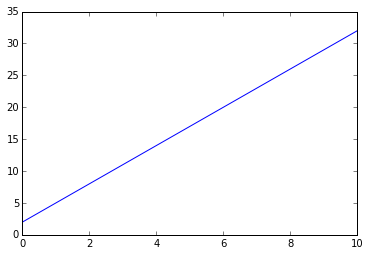

In [4]:
def f(x): return 3 * x + 2
xs = sp.linspace(0, 10)
plt.plot(xs, f(xs));

Skup primjera za učenje $\mathcal{D}=(\mathbf{X},\mathbf{y})$ dobiven je iz $f(x)$, uz dodatan šum:

In [5]:
X = 10 * sp.random.random(50)
y = f(X) + stats.norm.rvs(scale=3, size=50)

In [6]:
X

array([ 0.2038043 ,  5.92561965,  8.87291969,  1.44185831,  4.04639465,
        5.88615655,  9.40926572,  3.15127966,  6.81428556,  4.54026208,
        3.74876424,  6.30858923,  2.37768009,  5.88282376,  8.22122232,
        6.96559569,  3.06436274,  3.51260247,  5.19644301,  9.62070782,
        7.56474623,  1.71269008,  6.88702195,  2.97281789,  9.02262071,
        4.93928507,  2.99399674,  2.62094404,  4.61165266,  2.621978  ,
        4.25351136,  9.72045846,  4.0369531 ,  0.25770304,  1.28405592,
        8.42126714,  7.19870149,  1.21955002,  3.84750292,  5.99816728,
        8.10798606,  4.41766045,  4.26077275,  5.97305091,  0.27144507,
        6.84014389,  1.37258621,  9.57948302,  2.8678382 ,  8.33229192])

In [7]:
len(_)

50

In [8]:
y

array([  4.22617047,  18.63805044,  31.17669321,   7.19959468,
        16.54313221,  21.27117377,  26.60890448,  14.85560617,
        21.36755437,  15.83571743,  14.26830201,  18.99814388,
         9.47817141,  23.63205779,  26.56106999,  20.69034392,
        13.58043566,  17.30690396,  17.30349254,  29.50148737,
        26.64740159,   6.19344698,  22.61206878,  14.00901043,
        28.33859349,  16.67047397,  13.38622595,  10.01489834,
        15.63594858,   9.17564152,  11.56731312,  27.4597526 ,
        10.05957322,   5.00928464,   6.57850853,  24.98520009,
        25.8047188 ,   7.42478673,  17.51353718,  24.17111512,
        25.11078264,  14.90153054,  13.2077581 ,  18.34019671,
        -0.6118522 ,  27.24377591,   1.77565543,  28.17648544,
         5.37268427,  20.80241145])

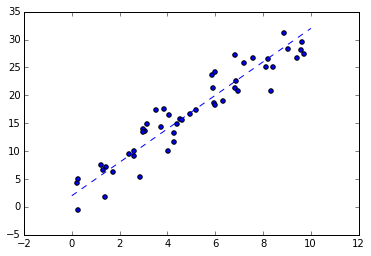

In [10]:
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.show()

Dvije hipoteze iz našeg modela:

In [11]:
def h1(x): return h(x, [0,1])
def h2(x): return h(x, [0,2])

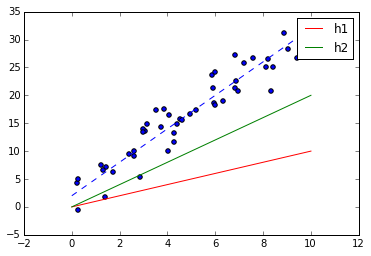

In [12]:
weights = [[0,1], [0,2], [1,2]]
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.plot(xs, h1(xs), 'r', label='h1')
plt.plot(xs, h2(xs), 'g', label='h2')
plt.legend();

Empirijske pogreške hipoteza na skupu $\mathcal{D}$:

In [13]:
error(h1, X, y)

4328.602078260581

In [14]:
error(h2, X, y)

1492.8434254172773

**(3) Optimizacijski postupak**

* Tražimo $h\in\mathcal{H}$ koja minimizira empirijsku pogrešku

$$
h^* = 
\mathrm{argmin}_{h\in\mathcal{H}} E(h|\mathcal{D}) = 
\mathrm{argmin}_{h\in\mathcal{H}} \frac{1}{2}
\sum_{i=1}^N\big(y^{(i)}-h(x^{(i)})\big)^2
$$

* Hipoteza $h$ je indeksirana parametrima $(w_0, w_1)$, dakle zapravo tražimo

$$
(w_0,w_1)^* =
\mathrm{argmin}_{w_0,w_1} \frac{1}{2} 
\sum_{i=1}^N\big(y^{(i)}-(w_1 x^{(i)} + w_0)\big)^2
$$

* U ovom slučaju postoji **analitičko rješenje** (rješenje u zatvorenoj formi)

\begin{eqnarray*}
    && \nabla_{w_0,w_1} E(h|\mathcal{D})=0\\
    &&\frac{\partial}{\partial w_0}\Big[
\frac{1}{2}\sum_i^N\big(y^{(i)}-(w_1 x^{(i)}+ w_0)\big)^2\Big] = 0 \\
&&\frac{\partial}{\partial w_1}\Big[\frac{1}{2}\sum_i^N\big(y^{(i)}-(w_1 x^{(i)}+
w_0)\big)^2\Big] = 0\\
&&\vdots\\
&& w_0= \bar{y} - w_1\bar{x}\\
&& w_1 = \frac{\sum_i^N x^{(i)}y^{(i)} - N\bar{x}\bar{y} }
{\sum_i^N(x^{(i)})^2 - N\bar{x}^2}
\end{eqnarray*}


In [15]:
N = len(X)
x_mean = sp.mean(X)
y_mean = sp.mean(y)
w1 = (np.dot(X, y) - N * x_mean * y_mean) / (sum(X**2) - N * (x_mean**2))
w0 = sp.mean(y) - w1 * sp.mean(X)

In [16]:
print w1, w0

2.79743143699 2.97883751639


In [17]:
def h_best(x): return h(x, [w0,w1])

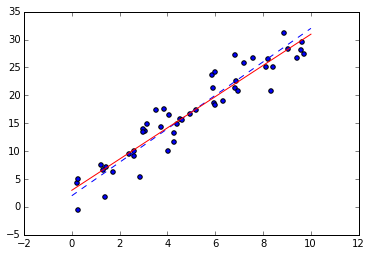

In [18]:
plt.plot(xs, f(xs), '--')
plt.scatter(X, y)
plt.plot(xs, h_best(xs), 'r');

In [19]:
error(h_best, X, y)

165.70760152981572

* U gornjem primjeru radili smo s modelom prvog stupnja

$$
h_1(x) = w_1 x + w_0
$$

* Međutim, mogli smo odabrati i složeniji model, npr. polinom drugog stupnja:

$$
h_2(x) = w_2 x^2 + w_1 x + w_0
$$

* Ovo je i dalje linearna regresija, i dalje ima analitičko rješenje

* Možemo očekivati da vrijedi:
$$
E(h_2|\mathcal{D}) \leq E(h_1|\mathcal{D})
$$
Q: Zašto?


* Q: Koji model odabrati u ovom slučaju?


* Q: Koji model općenito odabrati za neke podatke $\mathcal{D}$?

#10. Problem šuma

* **Šum** je neželjena anomalija u podacima


* Mogući uzroci:
  * Nepreciznost pri mjerenju značajki
  * Pogreške u označavanju (engl. *teacher noise*)
  * Postojanje skrivenih značajki (latentnih varijabli)
  * Nejasne granice klasa (subjektivnost)


* Zbog šuma je granica između pozitivnih i negativnih primjera složenija nego što bi idealno bila!


* [Primjer 1: binarna klasifikacija po značajkama dobi i prihoda]


* Jednostavni modeli ne mogu doseći $E(h|\mathcal{D})=0$


* S druge strane, složeni modeli uče šum, a ne pravu klasifikaciju!


* [Primjer 2]


* Šum u načelu nije moguće odvojiti od pravih podataka
  * Moguće je samo za stršeće vrijednosti (engl. *outliers*)

#11. Odabir modela

* Moramo odabrati model $\mathcal{H}$ (učenje bez pristranosti je uzaludno)!


* Često radimo odabir modela unutar neke familije modela (npr. kod regresije: odabir stupnja polinoma)


* Stupanj polinoma je **hiperparametar** modela ($w_i$ su parametri)


* ** Odabir modela = optimizacija modela, odabir parametara **


* Očito, što je veći kapacitet modela $\mathcal{H}$, to je manja pogreška $E(h|\mathcal{D})$, $h\in\mathcal{H}$


* Ali model mora moći **generalizirati!**


* Preferiramo jednostavne modele
  * bolja generalizacija
  * lakše učenje/uporaba
  * lakše tumačenje


* **Occamova britva**


* Trebamo odabrati model koji točno odgovara *pravoj složenosti* funkcije koju nastojimo naučiti
